## Load Amazon Review Data

This notebook will load the Amazon Review Data for the Toy category. The data is an open data set hosted on AWS and can be accessed at https://s3.amazonaws.com/amazon-reviews-pds/readme.html

In [2]:
import AmazonReviews

import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
import seaborn as sns

% matplotlib inline

%config InlineBackend.figure_format = 'png'

import matplotlib as mpl
mpl.rcParams['figure.dpi']= 300

A custom class was developed to load the Amazon review data. This same class can be utilized for any of the Amazon review data files. The data was download to our data directory and will now be loaded. The data is filterd to be only from 2014 to 2015. The fitler is configurable.

In [3]:
ar = AmazonReviews.AmazonReviews()

PATH = '../data/amazon_reviews_us_Toys_v1_00.tsv'
ar.load_data(PATH)

print(ar.date_filter)

Read from pickle...
2014-01-01 00:00:00


The `load_data` function will attempt to read the file from a pickle file, if one does not exist, then the data is loaded from the raw file. If the data is read from a raw file, then a pickle is created for subsequent loads. The pickled data is the **unfiltered** data frame.

The result of loading the data is a populated data frame called `reviews_df`.

In [4]:
ar.reviews_df.sample(5)

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
752116,US,36065695,R30PA06Q0FC9GB,B00FMHUCZE,15005731,Disney Beat The Parents Board Game - Who Knows...,Toys,5.0,0.0,0.0,N,Y,Five Stars,Love it!!!,2015-04-06
1124911,US,43266313,R1HL4R76N3VU2X,B00LT9YTXK,333628486,Yu-Gi-Oh! - Odd-Eyes Dragon (YS14-ENA01) - Spa...,Toys,5.0,0.0,0.0,N,Y,Five Stars,kid is happy,2015-02-06
2072309,US,6521871,R22MIVS8B0411C,B000O84A6S,708989600,Ty Beanie Babies Garfield - Keychain,Toys,5.0,0.0,0.0,N,N,Five Stars,love,2014-09-16
1607220,US,25314555,RT7A2EPFJL5GP,B00408K8P0,412889241,Fun Express Wooden Train Whistles,Toys,1.0,0.0,0.0,N,Y,I was very disappointed with my purchase as th...,Upon opening the package of whistles I noticed...,2014-12-18
2851516,US,17759762,R3RRG5TUY973GH,B0051EZAI2,144756153,Badger Basket Doll Travel Case with Bed and Be...,Toys,5.0,0.0,0.0,N,Y,Great item for storage and travel,These travel cases are perfect for American Gi...,2014-01-12


The review data for Toys is now loaded. Next, we need to determine what products are trending. The trending metric is calculated 30 days from the first review of each product. Within those 30 days for each product, a trend score is calcualted as the following,

$$Review Rate = \frac{Total Reviews}{Review Window}$$

$$Reiew Success = \frac{Review Rate * Median Score}{Std Score}$$

The `star_rating` is from 1 to 5. I wanted to differentiate more from a 1 to a 5, so each star rating is raised to 1.5, prior to calculating median and standard deviation. 

Lastly, the `review_success` is tranformed into a `trend_score` by utilizing a `tanh` function.

In [5]:
ar.calc_trend_score()

In [6]:
ar.create_observations()

In [7]:
ar.obs[ar.obs.trend == 1].to_csv('../data/trending_reviews.csv')

In [8]:
stop_words = set(STOPWORDS)
stop_words.update(['br', 'year','got','toy', 'one'])

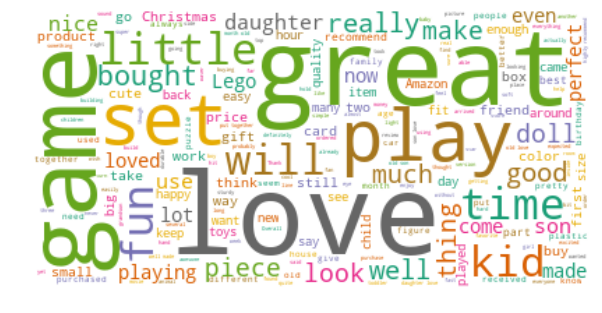

In [9]:
text = ' '.join(ar.obs.loc[ar.obs.trend==1,'review_body'])

# Create and generate a word cloud image:
wordcloud = WordCloud(background_color='white', stopwords=stop_words, colormap='Dark2').generate(text)

plt.figure(figsize=[10,10])
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

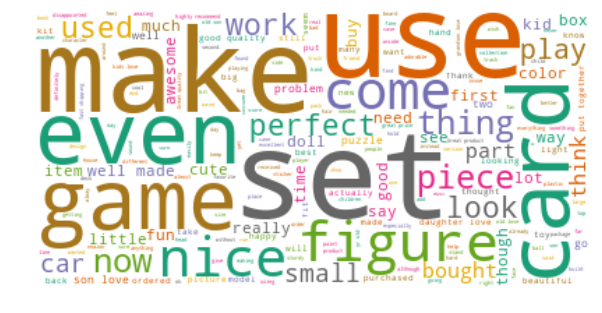

In [10]:
text = ' '.join(ar.obs.loc[ar.obs.trend==0,'review_body'])

# Create and generate a word cloud image:
wordcloud = WordCloud(background_color='white', stopwords=stop_words, colormap='Dark2').generate(text)

plt.figure(figsize=[10,10])
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

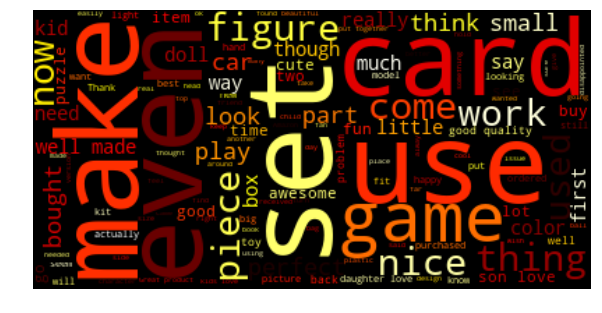

In [29]:
text = ' '.join(ar.obs.loc[:,'review_body'])

# Create and generate a word cloud image:
wordcloud = WordCloud(background_color='black', stopwords=stop_words, colormap='hot').generate(text)

plt.figure(figsize=[10,10])
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [12]:
top_products = ar.reviews_selected_df.product_id.value_counts().head(100)

ar.obs[ar.obs.product_id.isin(top_products.index) ]

,product_id,review_date,review_id,review_body,star_rating,trend
346,0975277324,2014-01-31,R1WI3K6JLAYZOZ,This is a really great board game. Turns are ...,5.0,1
361,0976990709,2014-02-02,R35QBJHCXY2MGN,"Great concept, great for the kids but........t...",3.0,1
1656,1933054395,2014-01-31,RWNR403AKUY5T,My daughter is 5 and half and she loves playin...,5.0,1
1933,8499000606,2014-01-31,R22WZ4JSCSRTG0,I bought one of these for all the grown boys o...,5.0,1
2303,B00000ISC5,2014-02-02,R1EOVAU2LBBTE7,"My son loved it! Very uncomplicated, Educatio...",5.0,1
2413,B00000IV35,2014-02-01,RV4Q9D58HL7YS,I gave this to a friend as a gift and she play...,5.0,1
2605,B00000J0S3,2014-01-31,R35L95S3AVETDH,"Quality pencils great deal for the price, so m...",5.0,1
2757,B00000JIVS,2014-01-31,R3QJ1QM6WEE749,Remember 10 x 10 inches is not very big....it'...,4.0,1
2861,B00000K3BR,2014-02-01,R3BE0UQWKEWR40,I bought this for my 4 year old grandson for C...,5.0,1
3403,B00004TZY8,2014-02-04,RDWVPXNQ6NNBM,The classic version of Uno. The original and ...,5.0,1


In [13]:
#B00LK1YMD4 - not trend
#0975277324 - trend
title = ar.reviews_selected_df.loc[ar.reviews_selected_df.product_id == '0975277324', 'product_title'].head(1)
title.values

array(['Ticket To Ride'], dtype=object)

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


''

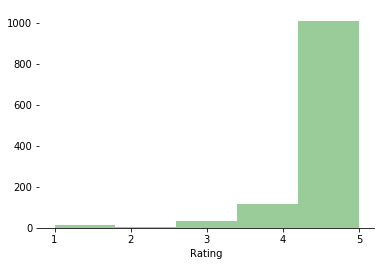

In [14]:
trend_data = ar.reviews_selected_df.loc[ar.reviews_selected_df.product_id.isin(['0975277324']), ['star_rating']]

fig, ax = plt.subplots()

sns.distplot(trend_data,kde=False, color='green', bins=5)
plt.xticks(range(1,6))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.xlabel('Rating')
# plt.title('Ticket to Ride')
;

In [15]:
title = ar.reviews_selected_df.loc[ar.reviews_selected_df.product_id == 'B00LK1YMD4', 'product_title'].head(1)
title.values

array(['The Amazing WUBBLE Bubble Ball - Looks like a bubble, plays like a ball! Blue'],
      dtype=object)

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


''

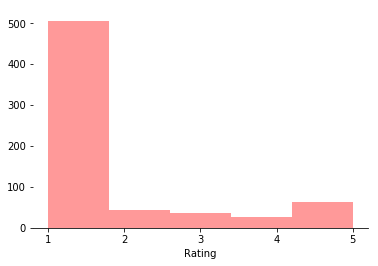

In [16]:
#B00LK1YMD4 - not trend
#0975277324 - trend

trend_data = ar.reviews_selected_df.loc[ar.reviews_selected_df.product_id.isin(['B00LK1YMD4']), ['star_rating']]
fig, ax = plt.subplots()

sns.distplot(trend_data,kde=False, color='red', bins=5)
plt.xticks(range(1,6))


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.xlabel('Rating')
# plt.title('The Amazing WUBBLE Bubble Ball - Looks like a bubble, plays like a ball! Blue')
;

In [17]:
reviews = ar.reviews_selected_df[ar.reviews_selected_df.product_id == '0975277324'].review_body.values
for r in reviews:
    print(r,'\n')

Our family loves this game! I saw it at Target but was able to buy it on amazon for $20 less. Very glad I did. This is easy enough for all ages but allows for strategy and keeps you interested. This game is one of our new family favorites. 

This game is really a great game once you understand the strategy . Got the free app to count up score at the end. 

On time, as advertised! 

My family loves this game. Lots of non electronic time. 

From ages 10 through adults, we all have a fantastic time playing this game!  Only wish that more people could play (maximum 5-person game) 

We love this game. It's easy to learn for beginners, and halfway into the first round, you begin to realize different strategies. This is a great family game, but it's also a great game for people that like to be competitive. You can &#34;block&#34; your opponents as part of your strategy. 

Good game.  Not the most exciting in terms of what happens during the game but it is easy enough to catch on to the strate

Gave this to a family with 1st-graders as their first board game, and they quite enjoyed playing it together. 

Ever since we got this game, my wife and I have played almost nonstop.  It's not hard at all to learn, but the nuances of different strategies keep it interesting even after lots of games.  It really is a good game for two players.  I've not played with five players, but I'm sure that the dynamic would be very different and even more intriguing. 

I needed that route!  You just cut me off, now instead of destination cards giving me gobs of points, now they all count against me.  There’s no way around!  My nerves have never felt more vexed than they do now.  That’s Jane Austin speak for: I’m seeing red and now I’m going to do anything I think might hurt your chances for the rest of the game; and the next one we play!<br /><br /> Ok, so the first time this happens, there’s usually another way around, it’s probably the long way around, but hopefully you have enough trains to mak